In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.contrib.keras.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.contrib.keras.python.keras.models import Model, Sequential
from tensorflow.contrib.keras.python.keras.optimizers import RMSprop
from tensorflow.contrib.keras.python.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import h5py

In [2]:
# variables

batch_size = 32
num_classes = 17
epochs = 100

In [3]:
features_path = 'output/flowers_17/vgg19/features.h5'
labes_path = 'output/flowers_17/vgg19/labels.h5'

In [4]:
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labes_path, 'r')

In [5]:
features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

In [6]:
features = np.array(features_string)
labels   = np.array(labels_string)

In [7]:
print(features.shape)
print(labels.shape)

(1360, 4096)
(1360,)


In [8]:
features.shape

(1360, 4096)

In [9]:
h5f_data.close()
h5f_label.close()

In [9]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features), 
                                                                  np.array(labels),
                                                                  test_size=0.1, 
                                                                  random_state=9)

In [10]:
from scipy import io

In [11]:
data_splits = io.loadmat('datasplits.mat')

In [12]:
trainData = []
testData = []
trainLabels = []
testLabels = []

In [13]:
for i in data_splits['trn1'][0]:
    trainData.append(features[i])
    trainLabels.append(labels[i])

for i in data_splits['tst1'][0]:
    testData.append(features[i])
    testLabels.append(labels[i])


In [14]:
trainData = np.array(trainData)
trainLabels = np.array(trainLabels)
testData = np.array(testData)
testLabels = np.array(testLabels)

In [15]:
print(trainData.shape)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(680, 4096)
(340, 4096)
(680,)
(340,)


In [19]:
testLabels

[]

In [16]:
# use logistic regression as the model
model = LogisticRegression(random_state=9)

In [17]:
model.fit(trainData, trainLabels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# use rank-1 and rank-5 predictions
f = open('output/flowers_17/vgg19/results.txt', "w")
rank_1 = 0
rank_5 = 0

In [19]:
# loop over test data
for (label, features) in zip(testLabels, testData):
    # predict the probability of each class label and 
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features))[0]
    predictions = np.argsort(predictions)[::-1][:5]
    
    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1
        
    # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1


In [20]:
# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
rank_5 = (rank_5 / float(len(testLabels))) * 100

In [21]:
# write the accuracies to file
f.write("rank-1: {:.2f}%\n".format(rank_1))
f.write("rank-5: {:.2f}%\n\n".format(rank_5))

16

In [22]:
# evaluate the model of test data
preds = model.predict(testData)

In [23]:
# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [24]:
import pickle

In [25]:
# dump classifier to file
with open('output/flowers_17/vgg19/classifier.cpickle', "wb") as f:
    pickle.dump(model, f)

In [27]:
with open('output/flowers_17/vgg19/classifier.cpickle', 'rb') as f:
    model2 = pickle.load(f)

In [26]:
# evaluate the model of test data
preds = model.predict(testData)

In [27]:
preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  2, 13,
        0, 13,  0,  1,  1,  1,  1,  1,  1, 13,  7,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1, 15,  2,  2,  2,  2,  2,  7,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  1,  2,  3,  3, 16,  3,  3,  3, 13, 13,
        3,  3,  3,  3,  3,  3, 13,  3,  3,  3,  3,  3,  4,  4,  0,  4,  0,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  2,  5,  5,  5, 16,  5,  5,
        5,  6,  6,  6,  6,  6,  2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  3,
        2,  6,  6,  6,  7,  7,  7,  0,  7,  7,  7,  7, 15,  7,  2,  6,  7,
        7,  7, 13,  7,  7, 13,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        6,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  8, 10,  9, 10, 10, 11,
       11, 11, 11, 10, 11

In [47]:
type(testData)

numpy.ndarray

In [28]:
class_names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
			   "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
			   "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
			   "windflower", "pansy"]

In [29]:
import os
import seaborn as sns

/home/gpu2/anaconda3/envs/dlsw/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


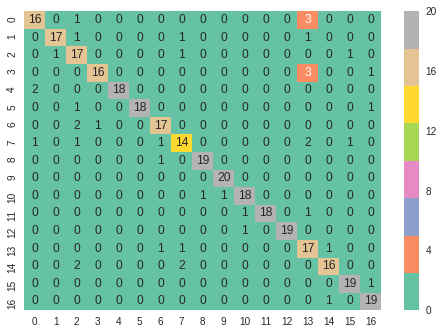

In [30]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm, 
            annot=True,
            cmap="Set2")
plt.show()

In [31]:
import glob

In [55]:
image_files = sorted(glob.glob('jpg/*.jpg'))

In [34]:
from scipy.ndimage import imread

In [62]:
i = 30

124
[1]


/home/gpu2/anaconda3/envs/dlsw/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


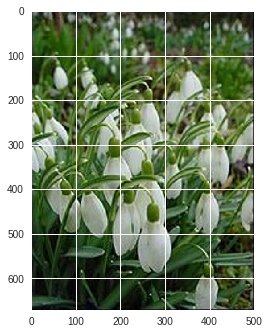

예측 :  snowdrop , 정답 :  snowdrop


In [63]:
print(data_splits['tst1'][0][i])
img_array = imread(image_files[data_splits['tst1'][0][i]])
pred = model.predict(testData[i])
print(pred)
plt.imshow(img_array)
plt.show()
print("예측 : ", class_names[pred[0]], ", 정답 : " , class_names[testLabels[i]])

In [64]:
i = 50

204


/home/gpu2/anaconda3/envs/dlsw/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


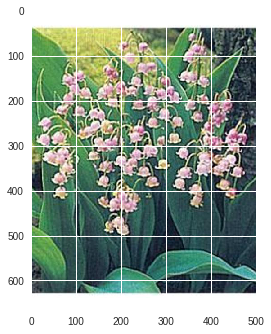

예측 :  lilyvalley , 정답 :  lilyvalley


In [65]:
print(data_splits['tst1'][0][i])
img_array = imread(image_files[data_splits['tst1'][0][i]])
pred = model.predict(testData[i])
plt.imshow(img_array)
plt.show()
print("예측 : ", class_names[pred[0]], ", 정답 : " , class_names[testLabels[i]])

284


/home/gpu2/anaconda3/envs/dlsw/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


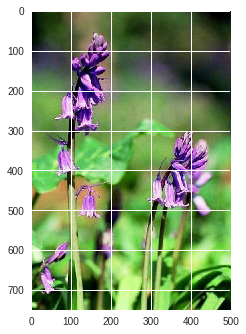

예측 :  bluebell , 정답 :  bluebell


In [66]:
i = 70
print(data_splits['tst1'][0][i])
img_array = imread(image_files[data_splits['tst1'][0][i]])
pred = model.predict(testData[i])
plt.imshow(img_array)
plt.show()
print("예측 : ", class_names[pred[0]], ", 정답 : " , class_names[testLabels[i]])